# <center> <h1> Titanic para Data Science</h1> </center>
 # <center> <h1>vive o muere </h1> </center>

**********  

El trabajo consiste en desarrollar un algoritmo con el que podamos predecir si el la probabilidad que una persona halla muerto en el Titanic, o tal vez poder saber si Jack realmente debio morir segun los datos del naufragio. Para lograr este objetivo, usaréis un conjunto de datos de la lista de pasajeros para poder analizar las variables necesarias y construir el modelo de machine learning que nos ayudará a validar los supuesto.

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.



¡Te animas!

leo.gonzlez11@gmail.com

## **1. Importa las librerías necesarias**

In [1]:
#importamos algunas librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importamos los datos pasamos el id de pasajero como index
train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

In [3]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

## **2. creamos un diccionario**

Utizaremos el set Train, que contiene el dato de si el pasajero sobrevivio o no

- passengerId : ID del pasajero abordo

- survival : Sí la persona sobrevivió o no el accidente

- pclase : Tipo de Ticket, e.g., 1ra, 2da, 3ra

- gender : Género del pasajero: Masculino o femenino

- name : Título incluído

- age : Edad en anos

- sibsp : Número de parientes/cónyuges abordo del Titanic

- parch : Número de padres/hijos abordo del Titanic

- ticket : Número Ticket

- fare : Costo pasaje

- cabin : Número cabina

- embarked : Puerto de embarcación

## **3. verificamos los datos disponibles**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


R// Podemos observar que el total de filas es de 891, ademas que **Age, Cabin y Embarked** contiene datos nulos, los que debemos revisar

In [5]:
#algunas descripciones de las variables numericas.
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

R// Si observamos la edad de los pasajeros podemos destacar que las personas que viajaban en el barco era bastante joven, la edad maxima era de 80 años y su minino entorno a cero (recien nacidos o lactantes), por otro lado el 75% de los pasajeros no superaba los 38 año de edad y el 50% no sobrepasaba los 28 años.

Por otro lado podemos ver que el ticket mas caro tuvo un valor cercano a los USD 512 y el munimo fue 0, lo que podria explicar que algunos pasajeros no tuvieron que pagar por su pasaje. (jack se dice se lo gano en una apuesta). Por lado la Desv Standar del precio es de u$49 con una media de USD 32

In [6]:
train.describe().style.background_gradient(cmap='coolwarm').set_precision(4)

In [7]:
#Revisemos las correlaciones de las variables para ver como se comportan incialmente
#Agregamos style para tener una relacion de colorres
train.corr().style.background_gradient()  #background_gradient(cmap='coolwarm')

In [8]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)#inidcalos los decimales de los datos

In [9]:
#puedes evaluar la realcion de todas las variables de tu df.
#train.style.background_gradient(cmap='coolwarm')

Podemos observar que a primeras no existe una correlacion relevante entre las variables numericas, sin embargo podemos hacer algunas correciones a los datos para poder tener mejores conclusiones

## **4. Limpiando la data**

sabemos que las var Age, Cabin y Embarked contiene valores nulos

Sabemos que Cabin tiene la mayor cantidad de datos nulos, elimar esas filas afectaria notablemente las conclusiones
entonces borraremos la columna, considerando que tampoco no entrega inf relevante por ahora.

In [10]:
#dejamos el df original por si queremos reinicar desde aca 
#train = pd.read_csv(r'data\train.csv')

In [12]:
train.groupby(['Sex','Survived'])['Age'].agg('describe')

count       mean        std   min    25%   50%    75%   max
Sex    Survived                                                             
female 0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
       1         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
male   0         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
       1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [13]:
train.groupby(['Sex','Survived'])['Age'].agg('sum')

Sex     Survived
female  0            1603.00
        1            5683.00
male    0           11382.50
        1            2536.67
Name: Age, dtype: float64

<AxesSubplot:ylabel='Survived,Sex'>

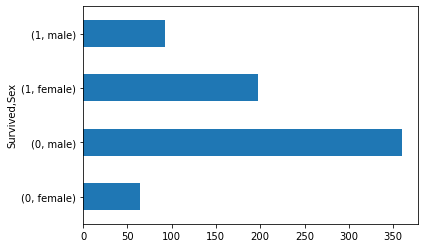

In [14]:
train.groupby(['Survived','Sex'])['Age'].agg('count').plot(kind='barh')

<AxesSubplot:xlabel='Survived,Pclass'>

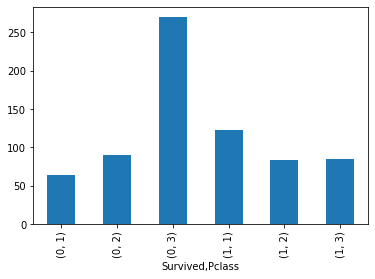

In [15]:
train.groupby(['Survived','Pclass'])['Age'].agg('count').plot(kind='bar')

Podemos ver que los pasajeros de 3ra clase fueron los que mas perdieron la vida, tambien podemos ver que fueron mas los hombres que murieron.

In [16]:
#Tambien podemos generar una funcion que agrupe
def graf_bar (argumento): #creamos una funcion que recibe un nombre de alguna columna puede tener el nombre que 
    #creamos las variables de acuerdo a la columna base
    vive = train[train['Survived']==1][argumento].value_counts()
    muere = train[train['Survived']==0][argumento].value_counts()
    #Creamos un df con esas variables y las dejamos en el index
    df = pd.DataFrame([vive,muere])
    df.index = ['vive','muere']
    #ahora podemos graficar en barras acumuladas
    df.plot(kind='bar', stacked = True)

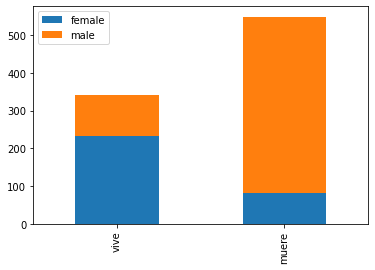

In [17]:
graf_bar('Sex')

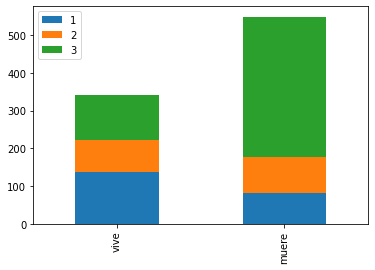

In [18]:
graf_bar('Pclass')

## sns.barplot:
La función a nivel de figura seaborn.catplot con el argumento kind = "bar" o la función a nivel de ejes seaborn.barplot generan gráficos de barras que tienen un comportamiento ligeramente diferente al habitual: normalmente un gráfico de barras muestra el recuento de valores en cada categoría. Aun cuando esta funcionalidad también está contemplada en seaborn, las funciones mencionadas van mucho más allá de un simple recuento: aplican una función que calcula una medida de tendencia central (por defecto es el valor medio) y muestran, aplicando bootstrapping, el intervalo de confianza del 95% para dicha medida.

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

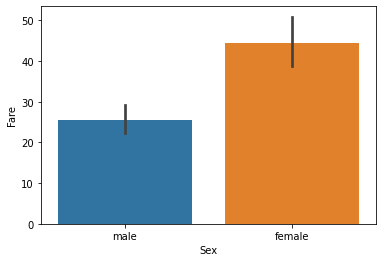

In [19]:
sns.barplot(x='Sex', y='Fare', data=train) #valore promedio de la barra 

In [20]:
train.groupby(['Sex'])['Fare'].agg('describe')

count       mean        std   min        25%   50%    75%       max
Sex                                                                        
female  314.0  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292
male    577.0  25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

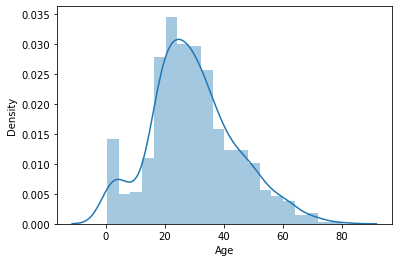

In [21]:
sns.distplot(train['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


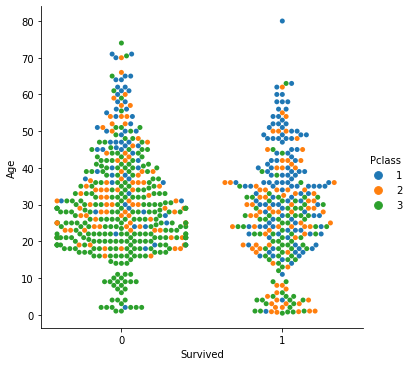

In [22]:
sns.catplot(y="Age", x="Survived", hue="Pclass", data=train,kind="swarm");
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


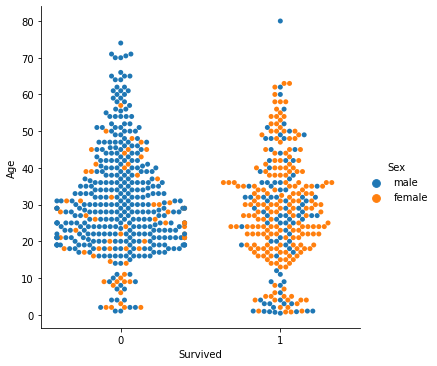

In [23]:
sns.catplot(y="Age", x="Survived", hue="Sex", data=train,kind="swarm");
plt.show()

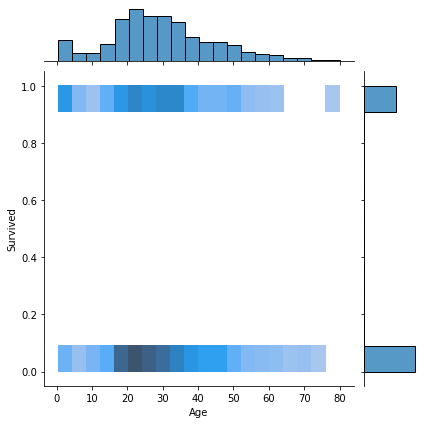

In [24]:
sns.jointplot(data=train, x ='Age', y ='Survived', kind='hist')
plt.show()

## Sin embargo si notamos existen datos que estan represetados por variables no numericas que pueden ser factores de realcion con los resultados del naufragio, es decir sobre si el pasajero sobrevive o no.

In [25]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S

Lo que haremos primero es transformar las variables Sex y Embarked en var categoricas

In [317]:
#importamos los datos pasamos el id de pasajero como index
train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')



# exiten varias formar de transformar datos 
train['Sex'].replace(['female','male'],[0,1],inplace=True)
train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

#para la data test
test['Sex'].replace(['female','male'],[0,1],inplace=True)
test['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

In [318]:
#Eliminaremos la calumna
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

test = test.drop(['Name','Ticket','Cabin'],axis=1)

In [319]:
# #utulizamos el metodo sklearn que nos permite entrenar algunos modelos regresivos, asigna variables de manear aleatoriatrain
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# train['Sex']=labelencoder.fit_transform(train['Sex'].values)
# train['Sex'].unique()
# #transformamos lo datos a valores para luego interpolar sobre los datos nulos
# labelencoder=LabelEncoder()
# train['Embarked']=labelencoder.fit_transform(train['Embarked'].astype(str))
# train['Embarked'].unique()

In [320]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500       1.0
1         1       1    0  38.0      1      0  71.2833       2.0
2         1       3    0  26.0      0      0   7.9250       1.0
3         1       1    0  35.0      1      0  53.1000       1.0
4         0       3    1  35.0      0      0   8.0500       1.0

In [321]:
#ahora podemos revisar los datos nulos para saber que hacemos con ellos
#seria interesanta saber por que faltan edades en el data
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [322]:
train['Age'].mean()

29.69911764705882

In [323]:
#Remplazamos los datos nulos por la mediana en cafa caso
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].median(), inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)


test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Embarked'].fillna(test['Embarked'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [324]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Podemos ver que existia un capitan e incluso una condesa abordo del barco

<AxesSubplot:>

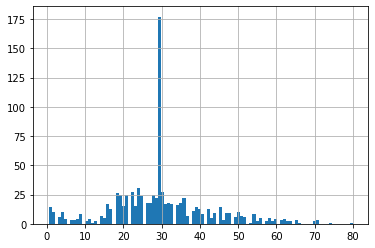

In [325]:
train['Age'].hist(bins=100)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

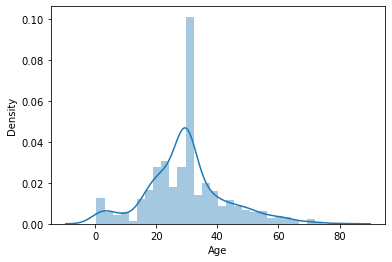

In [326]:
sns.distplot(train['Age'])

In [327]:
test.corr().style.background_gradient()

## Ahora vamos a entrenar el modelo para poder predecir si los pasajeros de ciertas caracteristica debieron morir o no 

In [328]:
test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [329]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500       1.0
1         1       1    0  38.0      1      0  71.2833       2.0
2         1       3    0  26.0      0      0   7.9250       1.0
3         1       1    0  35.0      1      0  53.1000       1.0
4         0       3    1  35.0      0      0   8.0500       1.0

In [330]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [331]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import *

In [332]:
#utilizaremos scitlearnk
#aca separo en columna con la inforacion de los sobrevivientes
X = np.array(train.drop(['Survived'], axis=1))
Y = np.array(train['Survived'])

In [333]:
#Seperamos la data en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [334]:
#regresion logistica
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, Y_train))

Precisión Regresión Logística:
0.8033707865168539


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [335]:
test_id = test['PassengerId']
prediccion_logreg = logreg.predict(test.drop('PassengerId', axis=1))


In [337]:
out_logreg = pd.DataFrame({ 'PassengerId' : test_id, 'Survived': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head(10))


Predicción Regresión Logística:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


In [339]:
out_logreg.to_csv('Resultados_titanic_LG.csv', index= False)

In [ ]:
#MAQUINA VECTORES
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, Y_train))

In [ ]:
prediccion_svc = svc.predict(train.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : id, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head())

In [ ]:
#vecinos mas cercanos
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, Y_train))

In [ ]:
ids = train['PassengerId']
prediccion_knn = knn.predict(train.drop('PassengerId', axis=1))
out_knn = pd.DataFrame({ 'PassengerId' : id, 'Survived': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head())